# Using LaVague for QA Automation

In this notebook, we'll show how LaVague can be used to automatically generate pytest files from a Gherkin test definition.

We will use the `TestGenerator` class that powers the `lavague-qa` CLI you can use to generate your tests fast. 

We will use LaVague to autonomously run the test and record xpath and actions. We'll then use an LLM to generate assert statements and the final reusable test file. 

In [1]:
from lavague.qa.generator import TestGenerator
import os

example_features = {
    "demo_hsbc": {
        "path": "./features/demo_hsbc.feature",
        "url": "http://hsbc.fr/"
    },
    "demo_dev": {
        "path": "./features/demo_dev.feature",
        "url": "http://google.com/"
    },
    "demo_laposte": {
        "path": "./features/demo_laposte.feature",
        "url": "http://laposte.fr/"
    },
    "demo_amazon": {
        "path": "./features/demo_amazon.feature",
        "url": "http://amazon.com/"
    },
    "demo_wikipedia": {
        "path": "./features/demo_wikipedia.feature",
        "url": "http://en.wikipedia.org"
    }
}

feature = example_features["demo_dev"]

generator = TestGenerator(feature["url"], feature["path"], headless=False, log_to_db=True)



Ready to generate tests on http://google.com/ for ./features/demo_dev.feature Feature: Google Login

  Scenario: User logs in successfully
    Given the user is on the homepage
    When the user Accept cookies
    Then the seach bar should be visible



/Users/palmi/Library/Caches/pypoetry/virtualenvs/lavague-l0lNI7_l-py3.11/lib/python3.11/site-packages/yaspin/core.py:119: UserWarning: color, on_color and attrs are not supported when running in jupyter
  self._color = self._set_color(color) if color else color


In [2]:
logs, nodes = generator.run_lavague_agent()
logs.head()

◟ Running agent... (0:00:01.14) 

2024-07-31 12:30:45,146 - INFO - Screenshot folder cleared


◝ Running agent... (0:00:08.97) 

2024-07-31 12:30:52,922 - INFO - Thoughts:
- The current screenshot shows the Google login page with a prompt to accept cookies.
- The first step in the scenario is to accept cookies.
- The objective is to ensure that the user accepts cookies to proceed further.
- The next step should involve clicking on the 'Accept all' button to accept cookies.

Next engine: Navigation Engine
Instruction: Click on the 'Accept all' button.


◜ Running agent... (0:00:24.85) 

2024-07-31 12:31:08,862 - INFO - Thoughts:
- The current screenshot shows the Google homepage.
- The objective is to ensure that the search bar is visible after accepting cookies.
- The previous instruction was to click on the 'Accept all' button, which seems to have been successful.
- The search bar is visible in the screenshot, indicating that the objective has been achieved.

Next engine: COMPLETE
Instruction: The search bar is visible on the Google homepage.
2024-07-31 12:31:08,863 - INFO - Objective reached. Stopping...


Connected to SQLite
Table created or altered successfully
◟ Running agent... (0:00:25.37) Log insert complete


,current_state,past,world_model_prompt,world_model_output,world_model_inference_time,screenshots,engine,instruction,engine_log,success,output,code,html,screenshots_path,url,date,tab_info,run_id,step
0,{'external_observations': {'vision': '[SCREENS...,"{'previous_instructions': '[NONE]', 'last_engi...",\nYou are an AI system specialized in high lev...,Thoughts:\n- The current screenshot shows the ...,4.556339,[<PIL.PngImagePlugin.PngImageFile image mode=R...,Navigation Engine,Click on the 'Accept all' button.,[{'navigation_engine_input': 'Click on the 'Ac...,True,NaN,"# Let's think step by step\n# First, we notice...","<html itemscope="""" itemtype=""http://schema.org...",screenshots/597581c21f3a2ce1556ce3b169c9c11a,https://www.google.com/,2024-07-31T12:30:48.351186,Tabs opened:\n0 - [CURRENT] Google,cf52d2c4-b025-4ee4-942c-061e99b6ecca,0
1,{'external_observations': {'vision': '[SCREENS...,{'previous_instructions': ' - Click on the 'Ac...,\nYou are an AI system specialized in high lev...,Thoughts:\n- The current screenshot shows the ...,7.462508,[<PIL.PngImagePlugin.PngImageFile image mode=R...,NaN,NaN,NaN,NaN,NaN,NaN,"<html itemscope="""" itemtype=""http://schema.org...",screenshots/597581c21f3a2ce1556ce3b169c9c11a,https://www.google.com/,2024-07-31T12:31:01.390057,Tabs opened:\n0 - [CURRENT] Google,cf52d2c4-b025-4ee4-942c-061e99b6ecca,1


In [3]:
actions, screenshot = generator.process_logs(logs)
print(actions)

Click on the 'Accept all' button. 
- actions:
    - action:
        args:
            xpath: "/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/div/button[2]"
        name: "click"

 


                     
You are an expert in software testing frameworks and Python code generation. You answer in python markdown only and nothing else.
Your only goal is to generate pytest-bdd files based on the provided Gherkin feature, a collection of instructions and actions, and a specific assert statement to test.
You will use the provided information to generate a valid assert statement. 
- Name the scenario appropriately.
- Always use time.sleep(3) if waiting is required.
- Include all necessary imports and fixtures.
- Use provided actions to find valid XPath selectors for the final pytest file. 
- You answer in python code only and nothing else.

I will provide an example below:
----------
Feature file name: example.feature

URL: https://www.example.com

Gherkin of the feature to be tested: 

Feature: E-commerce Website Interaction

  Scenario: Browse products and checkout
    Given I am on the example website
    When I navigate to the product catalog
    And I filter products
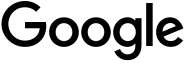

In [4]:

prompt = generator.build_prompt(nodes, actions)
print(prompt)


In [5]:
code = generator.generate_pytest(prompt, screenshot)
print(code)


                                         
import pytest
from pytest_bdd import scenarios, given, when, then, parsers
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import ElementClickInterceptedException
import time

# Constants
BASE_URL = 'http://google.com/'

# Scenarios
scenarios('demo_dev.feature')

# Fixtures
@pytest.fixture
def browser():
    driver = webdriver.Chrome()
    driver.implicitly_wait(10)
    yield driver
    driver.quit()

# Steps
@given('the user is on the homepage')
def go_to_homepage(browser):
    browser.get(BASE_URL)

@when('the user Accept cookies')
def accept_cookies(browser):
    accept_button = WebDriverWait(browser, 10).until(
        EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/div/button[2]"))
    )
    try:
        browser.exec

In [8]:
generator.write_files(code)
print(
    f"\nTests successfully generated\n - Run `pytest {generator.code_file_name}` to run the generated test."
)

◠ Writing files... 
- pytest: ./generated_tests/demo_dev.feature
- feature: ./generated_tests/demo_dev.py
                   
Tests successfully generated
 - Run `pytest demo_dev.py` to run the generated test.


# Run tests

We can finally run our generated test to see it in action

In [ ]:
!pytest demo_amazon.py

In [ ]:
!pytest demo_laposte.py

In [ ]:
!pytest demo_wikipedia.py

In [ ]:
!pytest demo_hsbc.py

In [ ]:
!pytest -v demo_endtoend.py

In [10]:
!pytest demo_dev.py

============================= test session starts ==============================
platform darwin -- Python 3.10.14, pytest-8.2.1, pluggy-1.5.0
rootdir: /Users/palmi/work/repos/fix-token-counter-name-lookup/LaVague/lavague-qa
configfile: pyproject.toml
plugins: anyio-4.3.0, bdd-7.1.2
collected 1 item                                                               

demo_dev.py .                                                            [100%]

============================== 1 passed in 11.29s ==============================
